In [ ]:
import numpy as np
import matplotlib.pyplot as plt

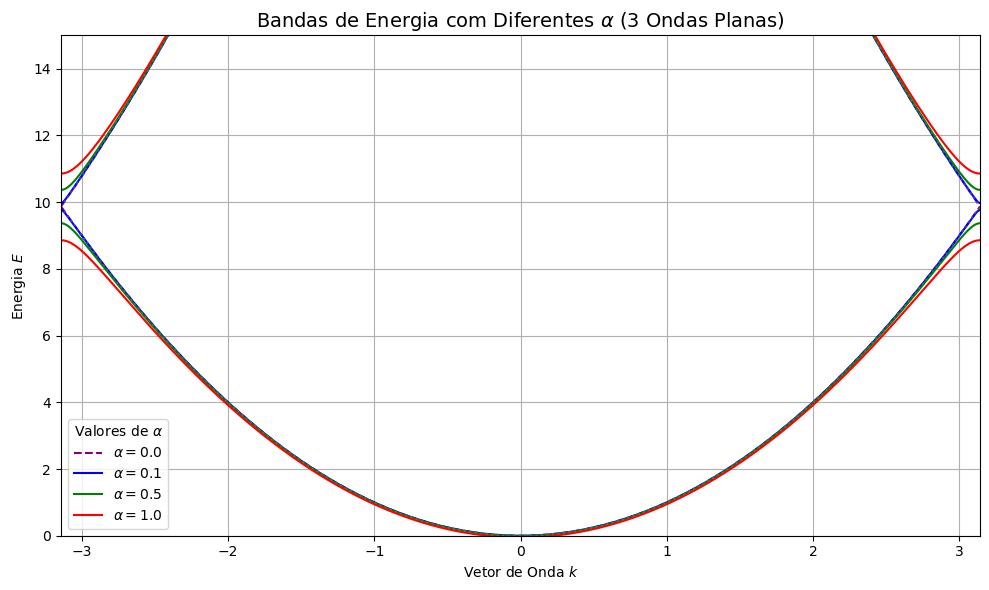

In [ ]:
def hamilt(ki, alpha, num_plane_waves):
    """
    Calculate the energy bands for a given wave vector and coupling parameter.
    
    Parameters:
    
    ki (array): Wave vectors.
    alpha (float): Coupling parameter.
    num_plane_waves (int): Number of plane waves to consider.
    
    Returns:
    energies (array): Calculated energy bands.
    
    """

    energies = []
    n = np.arange(-(num_plane_waves // 2), num_plane_waves // 2 + 1)
    G = 2*np.pi*n

    for k in ki:
        # Cria a matriz do Hamiltoniano tridiagonal
        H = np.zeros((num_plane_waves, num_plane_waves))

        for i in range(num_plane_waves):
            # Elementos diagonais: lambda_k-G_n = |k - G_n|^2
            H[i, i] = (k - G[i])**2

            # Elementos fora da diagonal (acoplamentos sucessivos)
            # Acoplamento com G_{n-1}
            if i > 0:
                H[i, i-1] = alpha
            # Acoplamento com G_{n+1}
            if i < num_plane_waves - 1:
                H[i, i+1] = alpha
        
        # Diagonaliza o Hamiltoniano para encontrar os autovalores (energias)
        # As energias são ordenadas automaticamente em ordem crescente
        eigenvalues = np.linalg.eigvalsh(H)
        energies.append(eigenvalues)
    
    return np.array(energies)

k = np.linspace(- np.pi, np.pi, 500)

plt.figure(figsize=(10, 6))
plt.title('Bandas de Energia com Diferentes $\\alpha$ (3 Ondas Planas)', fontsize=14)
plt.xlabel('Vetor de Onda $k$')
plt.ylabel('Energia $E$')
plt.xlim(- np.pi, np.pi)
plt.grid(True)

num_plane_waves = 5
alphas = [0.0, 0.1, 0.5, 1.0]
colors = ['purple', 'blue', 'green', 'red']

for idx, alpha in enumerate(alphas):
    band_energies = hamilt(k, alpha, num_plane_waves)
    
    for band_idx in range(band_energies.shape[1]):
        plt.plot(k, band_energies[:, band_idx], color=colors[idx], linestyle='-' if alpha > 0 else '--', label=f'$\\alpha={alpha}$' if band_idx == 0 else "")

n_values_for_ref = np.arange(-(num_plane_waves // 2), num_plane_waves // 2 + 1)
for n in n_values_for_ref:
    plt.plot(k, (k - 2 * np.pi * n)**2, ':', color='gray', alpha=0.5)

handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = list(dict.fromkeys(labels))
unique_handles = [handles[labels.index(ul)] for ul in unique_labels]
plt.legend(unique_handles, unique_labels, title="Valores de $\\alpha$")
plt.ylim(0, 15) # Ajusta o limite Y para focar no gap principal
plt.tight_layout()
plt.show()    

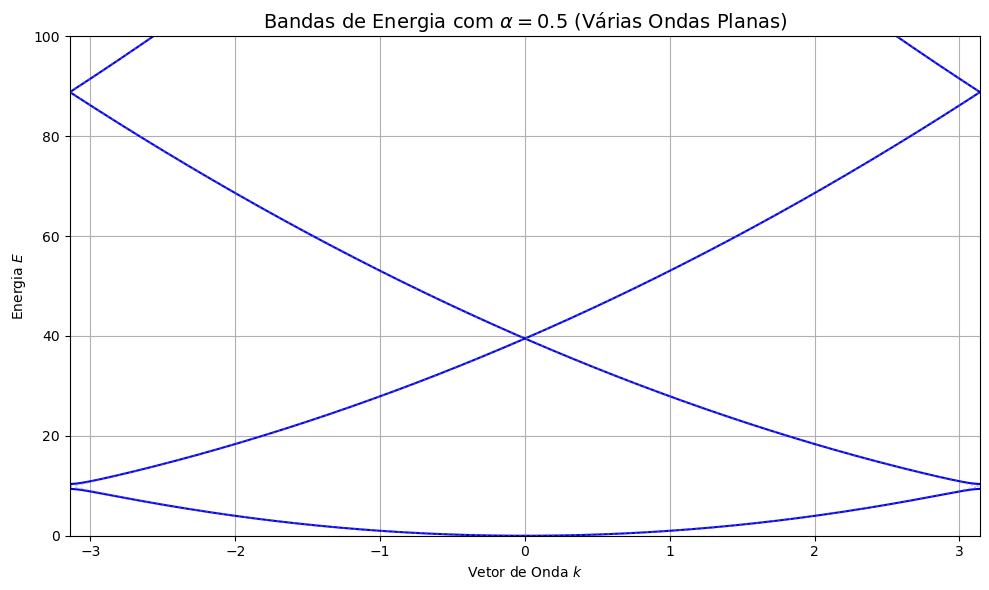

In [40]:
plt.figure(figsize=(10, 6))
plt.title('Bandas de Energia com $\\alpha=0.5$ (Várias Ondas Planas)', fontsize=14)
plt.xlabel('Vetor de Onda $k$')
plt.ylabel('Energia $E$')
plt.xlim(- np.pi, np.pi)
plt.grid(True)

# Um valor de alpha fixo para o segundo gráfico
fixed_alpha = 0.5 

# Um número maior de ondas planas para ver mais bandas
num_plane_waves_bigger = 17 

band_energy = hamilt(k, fixed_alpha, num_plane_waves_bigger)

for band_idx in range(num_plane_waves_bigger):
    plt.plot(k, band_energy[:, band_idx], color='blue')
    
# Adicionar as parábolas de elétron livre para contexto
n_values_for_refe = np.arange(-(num_plane_waves_bigger // 2), num_plane_waves_bigger // 2 + 1)
for n in n_values_for_refe:
    plt.plot(k, (k - 2 * np.pi * n)**2, ':', color='gray', alpha=0.5)

plt.ylim(0, 100) # Ajusta o limite Y para ver mais bandas
plt.tight_layout()
plt.show()